# Number of Businesses by Owner Race Group and Highest Level of Owner Education for the United States, Wisconsin, and Minnesota
##### This notebook includes ETL and code to examine the relationships between owner race group and highest level of owner education and the number of corresponding businesses in the United States, Wisconsin, and Minnesota. Data are sourced from the 2019 ABS Company Summary API and the 2019 ABS Characteristics of Business Owners API published by the United States Census Bureau.

In [2]:
# module imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# api_key
api_key = '{YOUR_KEY}}'

In [3]:
# function to extract data
def getDF(url): # takes an API call url, returns a pandas DataFrame
    response = requests.get(url).json()
    labels = response[0]
    rows = response[1:]
    df = pd.DataFrame(rows, columns=labels)
    return df

### ETL
###### This ETL applies to the following 3 code blocks.
###### Number steps indicate that the corresponding steps should be executed in the specified order. Order does not matter for unnumbered steps.
##### Extraction
###### 1) Call the 2019 ABS Company Summary API to retrieve data for business owner race groups (RACE_GROUP, RACE_GROUP_LABEL) and the associated number of employer businesses (FIRMPDEMP) for [the United States, Wisconsin, Minnesota].
###### 2) Store the data in a pandas dataframe. 
##### Transformation
###### Drop RACE_GROUP and us from the data frame.
###### Sort the values for RACE_GROUP_LABEL in descending order.
###### Cast FIRMPDEMP values as integers.
##### Load
###### The data are not being loaded into any databases.
###### Instead, load the data into matplotlib.pyplot or seaborn to create visualizations.

In [4]:
# function to transform Company Summary data
def CBtransformDF(df):
    df = df.sort_values(by='RACE_GROUP_LABEL', ascending=False)
    df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)
    return df

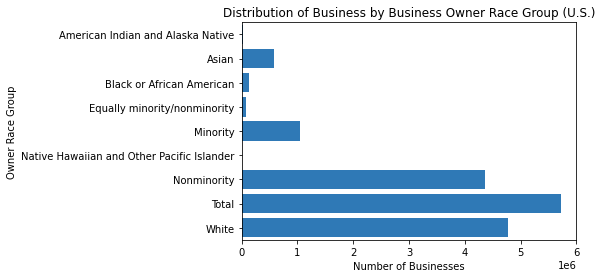

In [5]:
# Businesses by Business Owner Race Group (U.S.)
df = getDF(f'https://api.census.gov/data/2018/abscb?get=RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP&for=us:*&key={api_key}')
cbUS = CBtransformDF(df)
ax = sns.barplot(x="FIRMPDEMP", y="RACE_GROUP_LABEL", data=cbUS, color="#187BCD",order=sorted(cbUS['RACE_GROUP_LABEL']))
ax.set(title='Distribution of Business by Business Owner Race Group (U.S.)',xlim=(0, 6000000), ylabel="Owner Race Group",
       xlabel="Number of Businesses")
sns.despine(right=False, left=False, top=False, bottom=False)

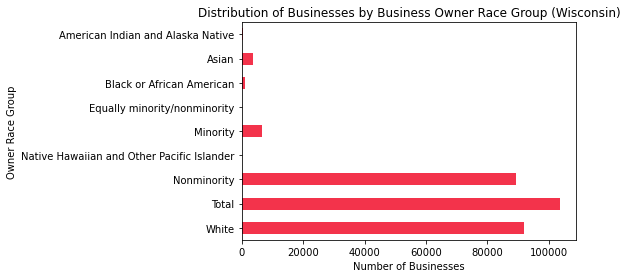

In [6]:
# Businesses by Business Owner Race Group (Wisconsin)
df = getDF(f'https://api.census.gov/data/2018/abscs?get=RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP&for=state:55&key={api_key}')
cbWI = CBtransformDF(df)
ax = cbWI.plot(x='RACE_GROUP_LABEL',y='FIRMPDEMP',title='Distribution of Businesses by Business Owner Race Group (Wisconsin)',kind='barh',color='#F3334B')
ax.set_ylabel('Owner Race Group')
ax.set_xlabel('Number of Businesses')
ax.get_legend().remove()
plt.show()


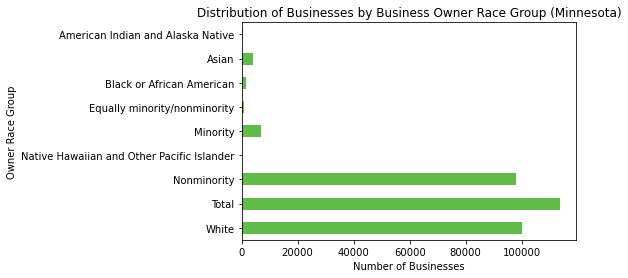

In [7]:
# Businesses by Business Owner Race Group (Minnesota)
df = getDF(f'https://api.census.gov/data/2018/abscs?get=RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP&for=state:27&key={api_key}')
cbMN = CBtransformDF(df)
ax = cbMN.plot(x='RACE_GROUP_LABEL',title='Distribution of Businesses by Business Owner Race Group (Minnesota)',kind='barh',color='#60BB48')
ax.set_ylabel('Owner Race Group')
ax.set_xlabel('Number of Businesses')
ax.get_legend().remove()
plt.show()

### ETL
###### This ETL applies to the following 4 code blocks.
###### Number steps indicate that the corresponding steps should be executed in the specified order. Order does not matter for unnumbered steps.
##### Extraction
###### 1) Call the 2019 ABS Characteristics of Business Owners API to retrieve data for the highest level of education for business owners(QDESC_LABEL, OWNCHAR, OWNCHAR_LABEL) and the associated number of employer businesses (OWNPDEMP) for [the United States, Wisconsin, Minnesota] where the survey question relates to education level (QDESC=007).
###### 2) Store the data in a pandas dataframe. 
##### Transformation
###### Drop all columns except for OWNCHAR_LABEL and OWNPDEMP.
###### Cast OWNPDEMP values as integers.
###### Sort the values for OWNCHAR_LABEL in ascending order.
##### Load
###### The data are not being loaded into any databases.
###### Instead, load the data into matplotlib.pyplot or seaborn to create visualizations.

In [8]:
# function to transform data
def CBOtransformDF(df):
       df = df[['OWNCHAR_LABEL', 'OWNPDEMP']].copy()
       df['OWNPDEMP'] = df['OWNPDEMP'].astype(int)
       df = df.sort_values(by='OWNCHAR_LABEL')
       return df

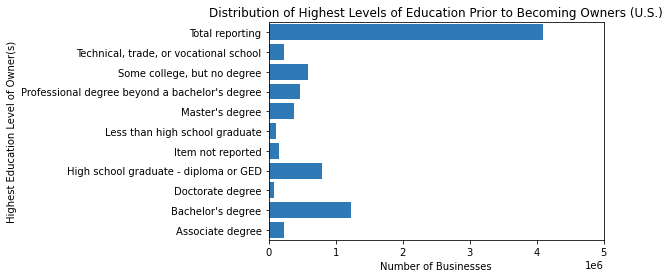

In [13]:
# characteristics of business owners - US
url = f'https://api.census.gov/data/2018/abscbo?get=QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,OWNPDEMP&for=us:*&QDESC=O07&key={api_key}'
df = getDF(url)
cboUS = CBOtransformDF(df)
ax = sns.barplot(x="OWNPDEMP", y="OWNCHAR_LABEL", data=cboUS, color="#187BCD", order=sorted(cboUS['OWNCHAR_LABEL'],reverse=True))
ax.set(title='Distribution of Highest Levels of Education Prior to Becoming Owners (U.S.)',xlim=(0, 5000000), ylabel="Highest Education Level of Owner(s)",
       xlabel="Number of Businesses")
sns.despine(right=False, left=False, top=False, bottom=False)

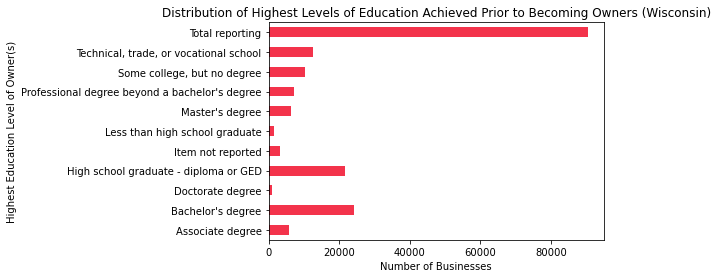

In [14]:
# characteristics of business owners - Wisconsin
url = f'https://api.census.gov/data/2018/abscbo?get=QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,OWNPDEMP&for=state:55&QDESC=O07&key={api_key}'
df = getDF(url)
cboWI = CBOtransformDF(df)
ax = cboWI.plot(x='OWNCHAR_LABEL',title="Distribution of Highest Levels of Education Achieved Prior to Becoming Owners (Wisconsin)",kind='barh',color='#F3334B')
ax.get_legend().remove()
ax.set_ylabel("Highest Education Level of Owner(s)")
ax.set_xlabel('Number of Businesses')
plt.show()

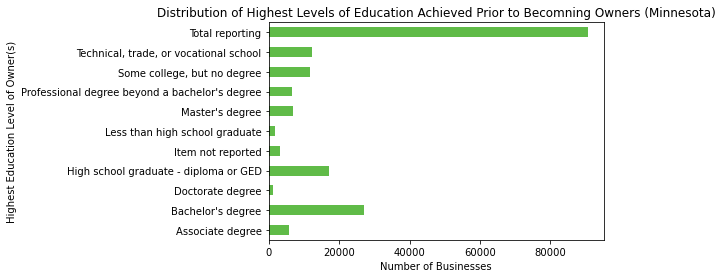

In [15]:
# characteristics of businness owners - Minnesota
url = f'https://api.census.gov/data/2018/abscbo?get=QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,OWNPDEMP&for=state:27&QDESC=O07&key={api_key}'
df = getDF(url)
cboMN = CBOtransformDF(df)
ax = cboMN.plot(x='OWNCHAR_LABEL',title="Distribution of Highest Levels of Education Achieved Prior to Becomning Owners (Minnesota)",kind='barh',color='#60BB48')
ax.get_legend().remove()
ax.set_ylabel("Highest Education Level of Owner(s)")
ax.set_xlabel('Number of Businesses')
plt.show()